# Pré-processamento dos dados das exportações do RN
## Etapa 3 - Engenharia de atributos

<img height="200" src="https://share-eric.eu/fileadmin/_processed_/b/5/csm_dataheader_ec9ee966be.jpg" width="600"/>

# Carregando base de dados das exportações do RN após etapa 2 de pre-processamento

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats


In [34]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_sem_outliers = pd.read_csv('../../../data/interim/preprocessing/02_dataset_expo_rn_NO_OUTLIERS.csv')
dataset_exportacoes_outubro = pd.read_csv('../../../data/interim/preprocessing/01_dataset_expo_rn_outubro_data_cleaning.csv')
dataset_exportacoes_outubro_sem_outliers = pd.read_csv('../../../data/interim/preprocessing/02_dataset_expo_rn_outubro_NO_OUTLIERS.csv')
dataset_exportacoes_com_outliers = pd.read_csv('../../../data/interim/preprocessing/02_dataset_expo_rn_OUTLIERS.csv')
dataset_exportacoes_com_outliers

,Bloco Econômico,Países,Via,URF,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
0,3,117,0,68,13021999,Outros sucos e extratos vegetais,130219,Sucos e extratos de outros vegetais (mamão sec...,57,495,12,27,1,17,8,3,0,0,2024-09-01
1,3,122,0,68,49111090,"Outros impressos publicitários, catálogos come...",491110,"Impressos publicitários, catálogos comerciais ...",229,383,44,33,9,12,8,5,0,0,2024-01-01
2,3,122,0,68,96110000,"Carimbos, incluindo os datadores e numeradores...",961100,"Carimbos, datadores, numeradores, sinetes e ar...",549,98,86,46,18,7,8,5,0,0,2024-01-01
3,3,122,0,68,61071200,"Cuecas e ceroulas, de malha, de uso masculino,...",610712,"Cuecas e ceroulas, de malha, de fibras sintéti...",276,153,55,83,10,6,5,5,0,1,2024-01-01
4,3,122,0,68,61072900,"Camisolões e pijamas, de malha, de uso masculi...",610729,"Camisolões e pijamas, de malha, de outras maté...",276,153,55,83,10,6,5,5,0,1,2024-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,6,108,4,41,25010090,"Outros tipos de sal, cloreto de sódio puro e á...",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,424298,24958710,24959,1997-05-01
57131,1,51,4,41,25010011,"Sal marinho, a granel, sem agregados",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,341000,31000000,31000,1997-10-01
57132,1,51,4,41,25010011,"Sal marinho, a granel, sem agregados",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,396000,36000000,36000,1997-08-01
57133,1,51,4,41,25010011,"Sal marinho, a granel, sem agregados",250100,Sal (incluídos o sal de mesa e o sal desnatura...,92,484,23,76,5,18,8,436680,36000000,36000,1997-02-01


# Criação de coluna soma mensal e soma anual para 'Valor US$ FOB' e 'Quilograma Líquido'

In [35]:
import pandas as pd

# Convertendo a coluna de data para o formato datetime
dataset_exportacoes_com_outliers['Data'] = pd.to_datetime(dataset_exportacoes_com_outliers['Data'], errors='coerce')
dataset_exportacoes_sem_outliers['Data'] = pd.to_datetime(dataset_exportacoes_sem_outliers['Data'], errors='coerce')
dataset_exportacoes_outubro['Data'] = pd.to_datetime(dataset_exportacoes_outubro['Data'], errors='coerce')
dataset_exportacoes_outubro_sem_outliers['Data'] = pd.to_datetime(dataset_exportacoes_outubro['Data'], errors='coerce')


# Extraindo ano e mês da coluna de data
dataset_exportacoes_com_outliers['ano'] = dataset_exportacoes_com_outliers['Data'].dt.year
dataset_exportacoes_com_outliers['mes'] = dataset_exportacoes_com_outliers['Data'].dt.month

dataset_exportacoes_sem_outliers['ano'] = dataset_exportacoes_sem_outliers['Data'].dt.year
dataset_exportacoes_sem_outliers['mes'] = dataset_exportacoes_sem_outliers['Data'].dt.month

dataset_exportacoes_outubro['ano'] = dataset_exportacoes_outubro['Data'].dt.year
dataset_exportacoes_outubro['mes'] = dataset_exportacoes_outubro['Data'].dt.month

dataset_exportacoes_outubro_sem_outliers['ano'] = dataset_exportacoes_outubro_sem_outliers['Data'].dt.year
dataset_exportacoes_outubro_sem_outliers['mes'] = dataset_exportacoes_outubro_sem_outliers['Data'].dt.month



# Calculando soma mensal
soma_mensal_com_outliers = dataset_exportacoes_com_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_mensal_sem_outliers = dataset_exportacoes_sem_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_mensal_outubro = dataset_exportacoes_outubro.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_mensal_outubro_sem_outliers = dataset_exportacoes_outubro_sem_outliers.groupby(['ano', 'mes', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()

# Calculando soma anual
soma_anual_com_outliers = dataset_exportacoes_com_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_anual_sem_outliers = dataset_exportacoes_sem_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_anual_outubro = dataset_exportacoes_outubro.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()
soma_anual_outubro_sem_outliers = dataset_exportacoes_outubro_sem_outliers.groupby(['ano', 'Código SH6'])[['Valor US$ FOB', 'Quilograma Líquido']].sum().reset_index()


# Merge com o dataset original para adicionar as colunas de soma mensal e anual
dataset_exportacoes_com_outliers = pd.merge(dataset_exportacoes_com_outliers, soma_mensal_com_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_com_outliers = pd.merge(dataset_exportacoes_com_outliers, soma_anual_com_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))


dataset_exportacoes_outubro = pd.merge(dataset_exportacoes_outubro, soma_mensal_outubro[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_outubro = pd.merge(dataset_exportacoes_outubro, soma_anual_outubro[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))


dataset_exportacoes_sem_outliers = pd.merge(dataset_exportacoes_sem_outliers, soma_mensal_sem_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_sem_outliers = pd.merge(dataset_exportacoes_sem_outliers, soma_anual_sem_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                            on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))


dataset_exportacoes_outubro_sem_outliers = pd.merge(dataset_exportacoes_outubro_sem_outliers, soma_mensal_outubro_sem_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                       on=['ano', 'mes', 'Código SH6'], how='left', suffixes=('', '_mensal'))

dataset_exportacoes_outubro_sem_outliers = pd.merge(dataset_exportacoes_outubro_sem_outliers, soma_anual_outubro_sem_outliers[['ano', 'Código SH6', 'Valor US$ FOB', 'Quilograma Líquido']],
                                       on=['ano', 'Código SH6'], how='left', suffixes=('', '_anual'))



# Exibindo os resultados finais
#dataset_exportacoes_com_outliers[['ano', 'mes', 'Código SH6', 'Valor US$ FOB', 'Valor US$ FOB_mensal', 'Valor US$ FOB_anual',
                                  #'Quilograma Líquido', 'Quilograma Líquido_mensal', 'Quilograma Líquido_anual']].head()
dataset_exportacoes_com_outliers = dataset_exportacoes_com_outliers.drop(["ano", "mes"], axis = 1)
dataset_exportacoes_sem_outliers = dataset_exportacoes_sem_outliers.drop(["ano", "mes"], axis = 1)
dataset_exportacoes_outubro = dataset_exportacoes_outubro.drop(["ano", "mes"], axis = 1)
dataset_exportacoes_outubro_sem_outliers = dataset_exportacoes_outubro_sem_outliers.drop(["ano", "mes"], axis = 1)

In [36]:
dataset_exportacoes_outubro.head()

,Países,Bloco Econômico,Via,URF,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,...,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data,Valor US$ FOB_mensal,Quilograma Líquido_mensal,Valor US$ FOB_anual,Quilograma Líquido_anual
0,0,3,0,2,8072000,Mamões (papaias) frescos,80720,Mamões (papaias) frescos,10,17,...,12,4,12788,9801,9801,2024-10-01,1524439,1324675,1524439,1324675
1,0,3,0,2,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",30,35,...,3,4,215,96,96,2024-10-01,811265,145440,811265,145440
2,0,3,0,4,8072000,Mamões (papaias) frescos,80720,Mamões (papaias) frescos,10,17,...,12,4,43394,33958,33958,2024-10-01,1524439,1324675,1524439,1324675
3,0,3,0,10,8072000,Mamões (papaias) frescos,80720,Mamões (papaias) frescos,10,17,...,12,4,1800,1800,1800,2024-10-01,1524439,1324675,1524439,1324675
4,0,3,0,13,8072000,Mamões (papaias) frescos,80720,Mamões (papaias) frescos,10,17,...,12,4,42259,31124,31124,2024-10-01,1524439,1324675,1524439,1324675


In [37]:
from IPython.display import display
import pandas as pd

# Exibe o resultado
pd.DataFrame({
    'Tipos dos dados dataset continente': dataset_exportacoes_sem_outliers.dtypes,
    #'Tipos dos dados dataset blocos econômicos': dataset_exportacoes_rn_blocos_economicos.dtypes,
    'Tipos dos dados dataset OUTUBRO': dataset_exportacoes_outubro.dtypes,
    'Tipos dos dados dataset OUTUBRO SEM OUTLIERS': dataset_exportacoes_outubro_sem_outliers.dtypes
    
})

,Tipos dos dados dataset continente,Tipos dos dados dataset OUTUBRO,Tipos dos dados dataset OUTUBRO SEM OUTLIERS
Bloco Econômico,int64,int64,int64
Código NCM,int64,int64,int64
Código SH2,int64,int64,int64
Código SH4,int64,int64,int64
Código SH6,int64,int64,int64
Código Seção,int64,int64,int64
Data,datetime64[ns],datetime64[ns],datetime64[ns]
Descrição NCM,object,object,object
Descrição SH2,int64,int64,int64
Descrição SH4,int64,int64,int64


# Análise da distribuição das colunas "Valor US$ FOB" e "Quilograma Líquido"

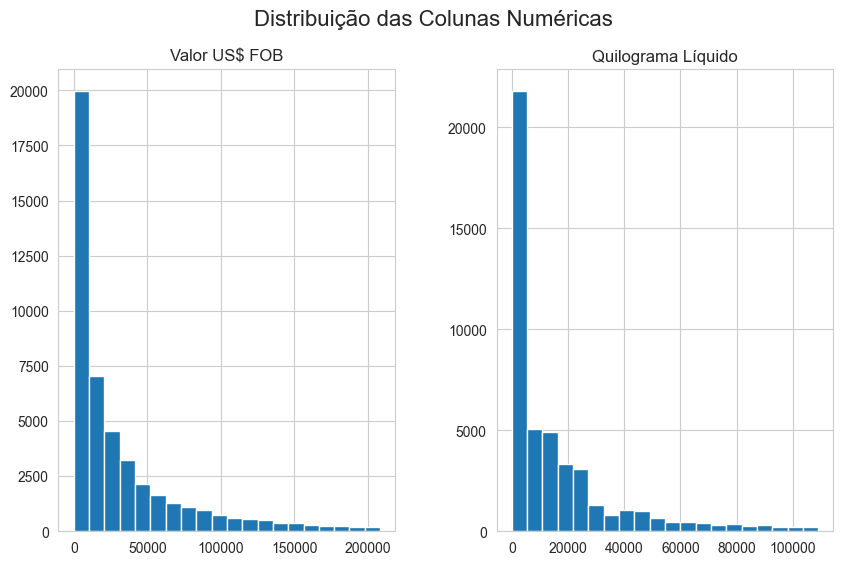

In [38]:
import matplotlib.pyplot as plt

# Plotar histogramas para as variáveis numéricas
dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribuição das Colunas Numéricas', fontsize=16)
plt.show()


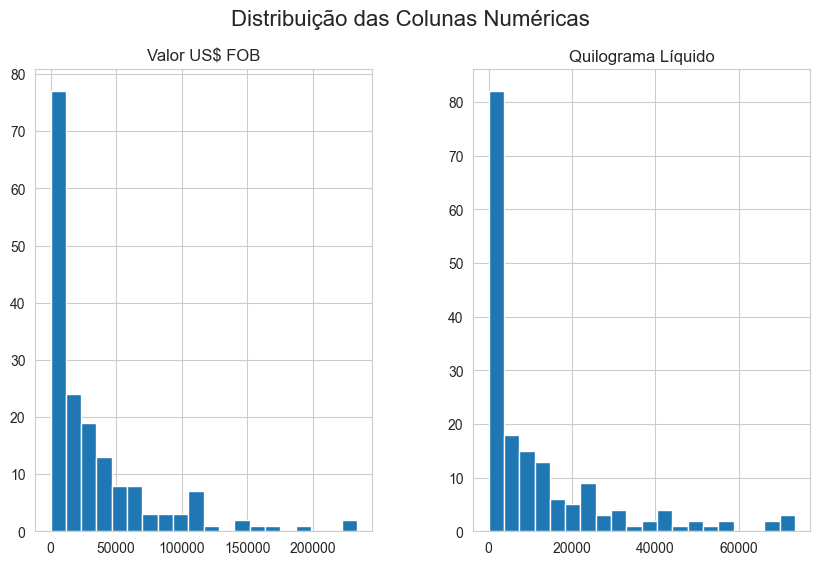

In [39]:
import matplotlib.pyplot as plt

# Plotar histogramas para as variáveis numéricas
dataset_exportacoes_outubro_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].hist(bins=20, figsize=(10, 6))
plt.suptitle('Distribuição das Colunas Numéricas', fontsize=16)
plt.show()


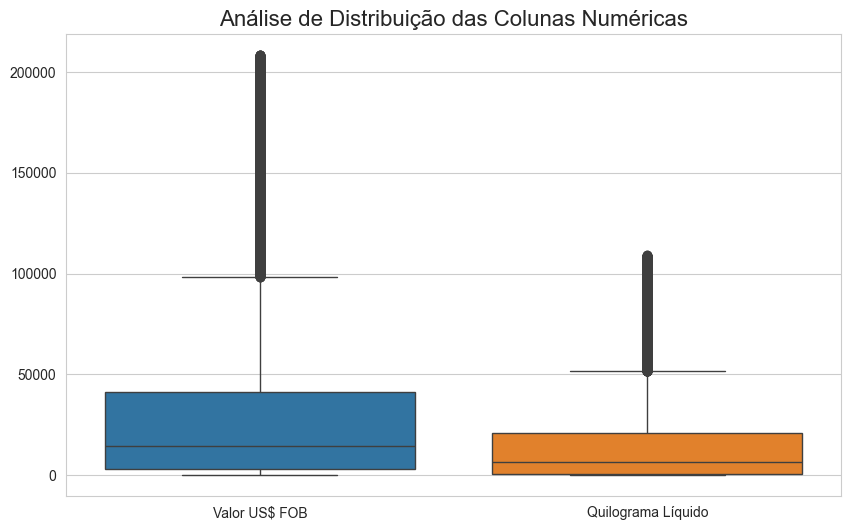

In [40]:
import seaborn as sns

# Plotar boxplots para as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']])
plt.title('Análise de Distribuição das Colunas Numéricas', fontsize=16)
plt.show()


In [41]:
import pandas as pd

# Calcular as médias, desvios padrão e variâncias
media_sem_outliers = dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].mean()
std_sem_outliers = dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].std()
variancia_sem_outliers = dataset_exportacoes_sem_outliers[['Valor US$ FOB', 'Quilograma Líquido']].var()

media_com_outliers = dataset_exportacoes_com_outliers[['Valor US$ FOB', 'Quilograma Líquido']].mean()
std_com_outliers = dataset_exportacoes_com_outliers[['Valor US$ FOB', 'Quilograma Líquido']].std()
variancia_com_outliers = dataset_exportacoes_com_outliers[['Valor US$ FOB', 'Quilograma Líquido']].var()

# Criar um DataFrame com as estatísticas comparativas
df_estatisticas = pd.DataFrame({
    'Média sem Outliers': media_sem_outliers,
    'Média com Outliers': media_com_outliers,
    'Desvio Padrão sem Outliers': std_sem_outliers,
    'Desvio Padrão com Outliers': std_com_outliers,
    'Variância sem Outliers': variancia_sem_outliers,
    'Variância com Outliers': variancia_com_outliers
})

df_estatisticas


,Média sem Outliers,Média com Outliers,Desvio Padrão sem Outliers,Desvio Padrão com Outliers,Variância sem Outliers,Variância com Outliers
Valor US$ FOB,31369.424339,163396.669064,41268.121585,1.271327e+06,1.703058e+09,1.616273e+12
Quilograma Líquido,15575.917056,589761.668574,21515.509801,6.669498e+06,4.629172e+08,4.448221e+13


# Definindo bases de dados normalizadas


# Análise da distribuição dos dados

C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 57135.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46272.
  res = hypotest_fun_out(*samples, **kwds)



Teste de Shapiro-Wilk para Valor US$ FOB:
Com Outliers - Estatística: 0.0701977147349051, p-valor: 2.0881224693189966e-165
Sem Outliers - Estatística: 0.7420936786228886, p-valor: 2.5032097632838405e-120

Teste de Anderson-Darling para Valor US$ FOB:
Com Outliers - Estatística: 17076.53329874661
Sem Outliers - Estatística: 3987.0311617937623
Com Outliers - Os dados NÃO são normais (p-valor <= 0.05)
Sem Outliers - Os dados NÃO são normais (p-valor <= 0.05)


C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 57135.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\joao1\DataspellProjects\analise_exportacoes_rn\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 46272.
  res = hypotest_fun_out(*samples, **kwds)



Teste de Shapiro-Wilk para Quilograma Líquido:
Com Outliers - Estatística: 0.05687968705795343, p-valor: 7.057299041376358e-166
Sem Outliers - Estatística: 0.7281986230556416, p-valor: 8.333291654300096e-122

Teste de Anderson-Darling para Quilograma Líquido:
Com Outliers - Estatística: 20238.015651822003
Sem Outliers - Estatística: 4042.9773515909183
Com Outliers - Os dados NÃO são normais (p-valor <= 0.05)
Sem Outliers - Os dados NÃO são normais (p-valor <= 0.05)


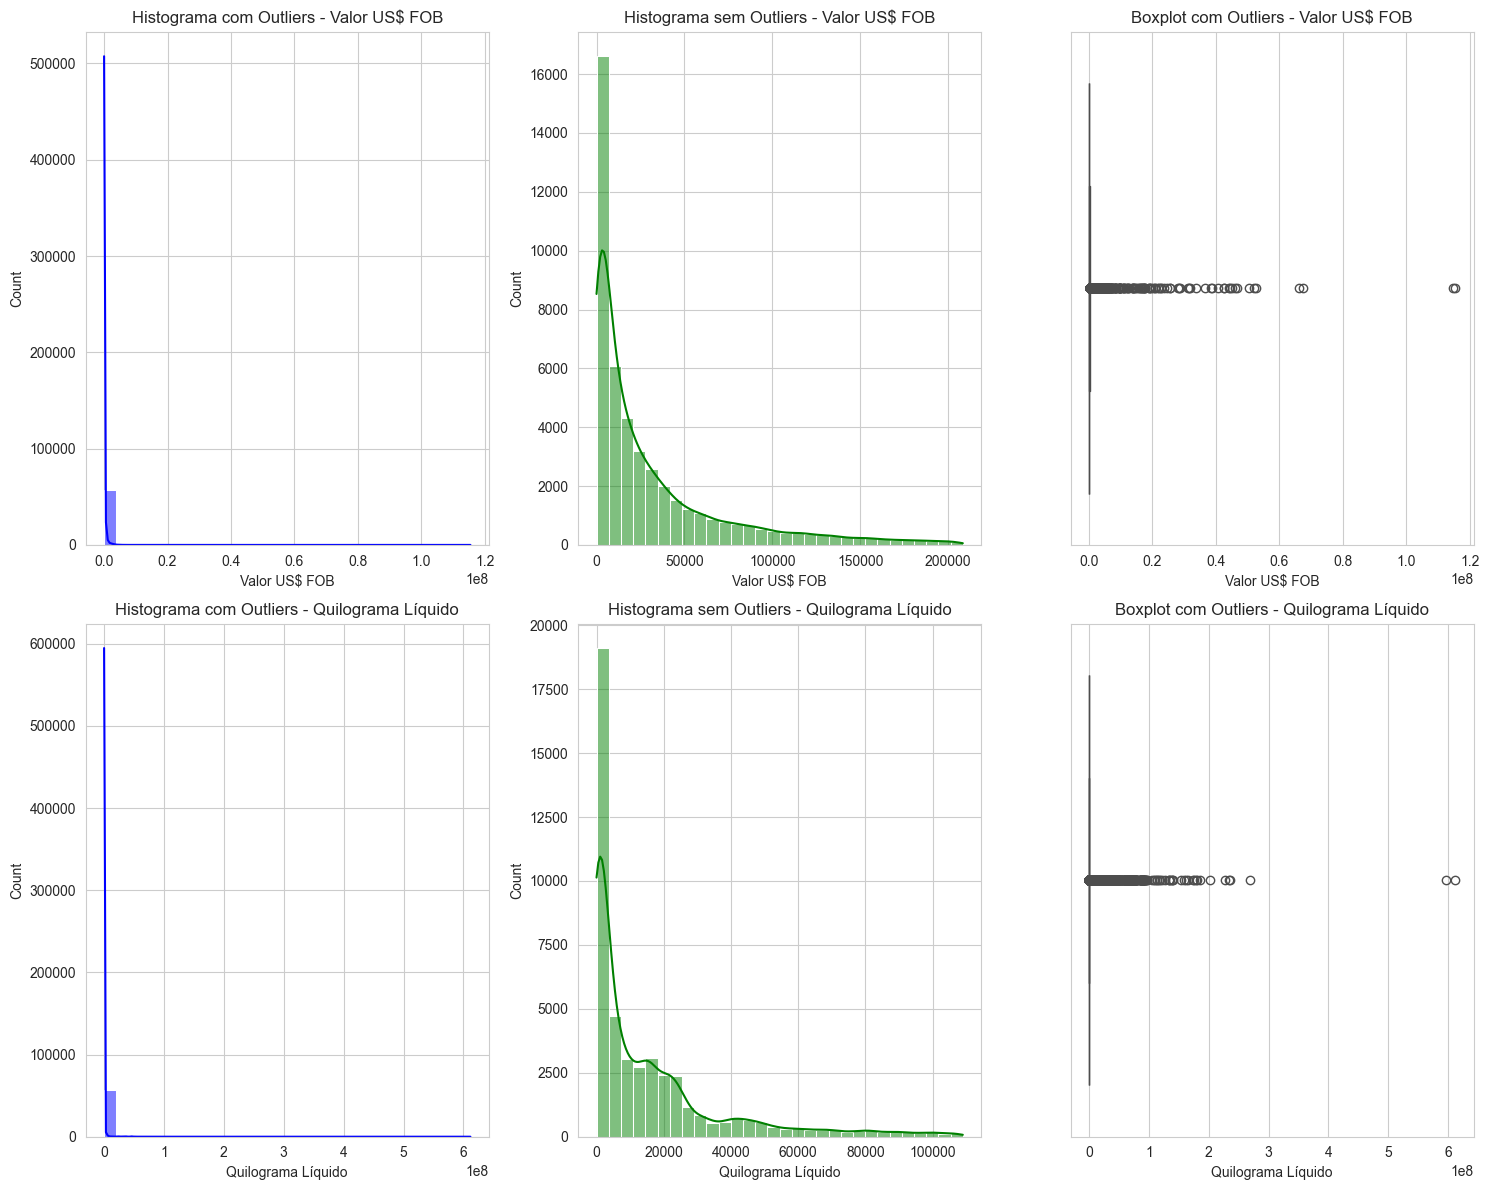

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Função para análise de distribuição com gráficos
def analisar_distribuicao(dataset_com_outliers, dataset_sem_outliers, colunas):
    # Criando a grade de gráficos
    fig, axes = plt.subplots(len(colunas), 3, figsize=(15, 6*len(colunas)))

    for i, coluna in enumerate(colunas):
        # Plotando o histograma
        sns.histplot(dataset_com_outliers[coluna], kde=True, ax=axes[i, 0], color='blue', bins=30)
        axes[i, 0].set_title(f'Histograma com Outliers - {coluna}')

        sns.histplot(dataset_sem_outliers[coluna], kde=True, ax=axes[i, 1], color='green', bins=30)
        axes[i, 1].set_title(f'Histograma sem Outliers - {coluna}')

        # Plotando o boxplot
        sns.boxplot(x=dataset_com_outliers[coluna], ax=axes[i, 2], color='blue')
        axes[i, 2].set_title(f'Boxplot com Outliers - {coluna}')

        # Teste de Shapiro-Wilk para normalidade
        stat_com_outliers, p_com_outliers = stats.shapiro(dataset_com_outliers[coluna])
        stat_sem_outliers, p_sem_outliers = stats.shapiro(dataset_sem_outliers[coluna])

        # Teste de Anderson-Darling para normalidade
        stat_anderson_com_outliers, crit_com_outliers, sig_com_outliers = stats.anderson(dataset_com_outliers[coluna], dist='norm')
        stat_anderson_sem_outliers, crit_sem_outliers, sig_sem_outliers = stats.anderson(dataset_sem_outliers[coluna], dist='norm')

        # Imprimindo os resultados dos testes de normalidade
        print(f'\nTeste de Shapiro-Wilk para {coluna}:')
        print(f'Com Outliers - Estatística: {stat_com_outliers}, p-valor: {p_com_outliers}')
        print(f'Sem Outliers - Estatística: {stat_sem_outliers}, p-valor: {p_sem_outliers}')

        print(f'\nTeste de Anderson-Darling para {coluna}:')
        print(f'Com Outliers - Estatística: {stat_anderson_com_outliers}')
        print(f'Sem Outliers - Estatística: {stat_anderson_sem_outliers}')

        # Verificando se os dados são normais com base no p-valor do Shapiro-Wilk
        if p_com_outliers > 0.05:
            print(f'Com Outliers - Os dados são normais (p-valor > 0.05)')
        else:
            print(f'Com Outliers - Os dados NÃO são normais (p-valor <= 0.05)')

        if p_sem_outliers > 0.05:
            print(f'Sem Outliers - Os dados são normais (p-valor > 0.05)')
        else:
            print(f'Sem Outliers - Os dados NÃO são normais (p-valor <= 0.05)')

    plt.tight_layout()
    plt.show()

# Definir as colunas para análise
colunas = ['Valor US$ FOB', 'Quilograma Líquido']

# Chamar a função passando os datasets e as colunas
analisar_distribuicao(dataset_exportacoes_com_outliers, dataset_exportacoes_sem_outliers, colunas)


# Matriz de confusão

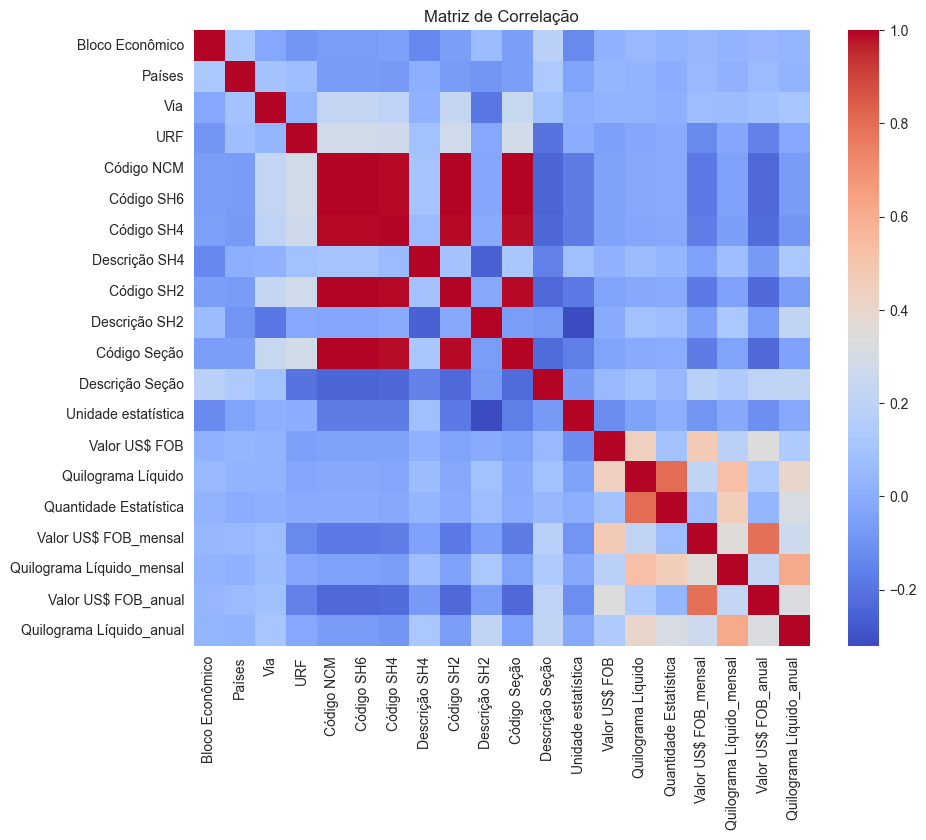

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionar apenas colunas numéricas
numerical_columns = dataset_exportacoes_com_outliers.select_dtypes(include=[np.number])

# Calcular a matriz de correlação
correlation_matrix = numerical_columns.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Matriz de Correlação")
plt.show()


# Exportando bases de dados apos engenharia de atributos

In [44]:
dataset_exportacoes_outubro.dtypes

Países                                int64
Bloco Econômico                       int64
Via                                   int64
URF                                   int64
Código NCM                            int64
Descrição NCM                        object
Código SH6                            int64
Descrição SH6                        object
Código SH4                            int64
Descrição SH4                         int64
Código SH2                            int64
Descrição SH2                         int64
Código Seção                          int64
Descrição Seção                       int64
Unidade estatística                   int64
Valor US$ FOB                         int64
Quilograma Líquido                    int64
Quantidade Estatística                int64
Data                         datetime64[ns]
Valor US$ FOB_mensal                  int64
Quilograma Líquido_mensal             int64
Valor US$ FOB_anual                   int64
Quilograma Líquido_anual        

In [47]:
dataset_exportacoes_com_outliers.to_csv("../../../data/interim/preprocessing/03_dataset_expo_rn_OUTLIERS_featured.csv", index=False)
dataset_exportacoes_sem_outliers.to_csv("../../../data/interim/preprocessing/03_dataset_expo_rn_NO_OUTLIERS_featured.csv", index=False)
dataset_exportacoes_outubro.to_csv("../../../data/interim/preprocessing/03_dataset_expo_rn_outubro_featured.csv", index=False)